### Calculating EKE and getting dominant period 

In [1]:
%matplotlib inline
#%config InlineBackend.figure_format='retina'

In [9]:
from matplotlib import rc
rc('font', **{'size':30})
#rc('text', usetex=True)
rc('xtick', labelsize=30) #20 
rc('ytick', labelsize=30) #20
rc('axes', titlesize=30)    # fontsize of the axes title
rc('axes', labelsize=30) #24    # fontsize of the x and y labels

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import xarray as xr
from xgcm import Grid

In [3]:
nlayers = 4

In [4]:
from dask.distributed import Client

c=Client(local_directory = '/scratch/e14/qo9901/') 
c 

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46465 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/46465/status,
Dashboard: /proxy/46465/status,Workers: 4
Total threads: 4,Total memory: 150.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43757,Workers: 4
Dashboard: /proxy/46465/status,Total threads: 4
Started: Just now,Total memory: 150.00 GiB
Comm: tcp://127.0.0.1:40527,Total threads: 1
Dashboard: /proxy/34843/status,Memory: 37.50 GiB
Nanny: tcp://127.0.0.1:37787,


In [5]:
from matplotlib import ticker, cm

In [6]:
import xrft
from dask.diagnostics import ProgressBar

### long test code -- skip

In [9]:
%%time
FileList = [folder + 'output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(51,71)] #20,70 for original wide, 51,71 for wide steep, 31,51 narrow steep

print(FileList)
dsx_prog_daily = xr.open_mfdataset(FileList, combine='by_coords', chunks={"Time": 20}, decode_times=False, preprocess = lambda d: d[['e', 'h','uh','vh']], engine='netcdf4', parallel=True)
dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)


['/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output051/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output052/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output053/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output054/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output055/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output056/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output057/prog_daily.nc', '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output058/prog_daily.nc', '/scrat

In [10]:
##Grid interpolation

In [11]:
import xgcm
grid = xr.open_mfdataset(folder+'output0*/ocean_geometry.nc', combine='by_coords')
grid_new = grid.rename({'latq': 'yq','lonq': 'xq','lath': 'yh','lonh': 'xh'})
grid_new

<xarray.Dataset>
Dimensions:  (yh: 500, xh: 1000, yq: 500, xq: 1000)
Coordinates:
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
Data variables: (12/19)
    geolatb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolonb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolat   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolon   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    D        (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    f        (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    ...       ...
    dyBu     (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Ah       (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Aq       (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dxCvo    (yq, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dyCuo    (yh, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    wet      (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
Attributes:
    filename:  ./ocean_geometry.nc

In [12]:
ds = xr.merge([dsx_prog_daily.uh, dsx_prog_daily.vh, grid_new])
ds

,Array,Chunk
Bytes,54.39 GiB,152.59 MiB
Shape,"(7300, 4, 500, 1000)","(20, 4, 500, 1000)"
Count,41 Graph Layers,380 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,54.39 GiB,152.59 MiB
Shape,"(7300, 4, 500, 1000)","(20, 4, 500, 1000)"
Count,41 Graph Layers,380 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [13]:
#ds.coords['xq'].attrs.update(axis='X')
#ds.coords['xh'].attrs.update(axis='X', c_grid_axis_shift=0.5)
#ds.coords['yq'].attrs.update(axis='Y')
#ds.coords['yh'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

ds.coords['xh'].attrs.update(axis='X')
ds.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yh'].attrs.update(axis='Y')
ds.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid = xgcm.Grid(ds, periodic=['X'])
grid

<xgcm.Grid>
Z Axis (not periodic, boundary=None):
  * center   zl
Y Axis (not periodic, boundary=None):
  * center   yh --> right
  * right    yq --> center
X Axis (periodic, boundary=None):
  * center   xh --> right
  * right    xq --> center

metrics = {
    ('X',): ['dxCu','dxCv', 'dxBu'], # X distances
    ('Y',): ['dyCu','dyCv', 'dyBu'], # Y distances
    ('X', 'Y'): ['Ah', 'Aq'] # Areas
}
grid = xgcm.Grid(ds, periodic=['X'], metrics = metrics)
grid

In [208]:
dsx_prog_daily.vh

,Array,Chunk
Bytes,54.39 GiB,152.59 MiB
Shape,"(7300, 4, 500, 1000)","(20, 4, 500, 1000)"
Count,41 Graph Layers,380 Chunks
Type,float32,numpy.ndarray


In [9]:
import cmocean, dask
dask.config.set(**{'array.slicing.split_large_chunks': False})
    

In [15]:
## defining ASCintrusion
intrusions = dsx_prog_daily.vh.isel(zl = 2).sel(yq = -100, method = "nearest").sum(dim = 'xh')

In [16]:
intrusions_arr = intrusions.load()

In [17]:
intrusions_arr

<xarray.DataArray 'vh' (Time: 7300)>
array([23421.871, 45199.344, 43713.   , ..., 32686.13 , 31963.443,
       33648.234], dtype=float32)
Coordinates:
    zl       float64 1.028e+03
  * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
    yq       float64 -100.0

In [30]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:32919': 531,
 'tcp://127.0.0.1:33779': 568,
 'tcp://127.0.0.1:35217': 569,
 'tcp://127.0.0.1:35377': 530,
 'tcp://127.0.0.1:44925': 577,
 'tcp://127.0.0.1:46787': 736}

Text(0.5, 1.0, '')

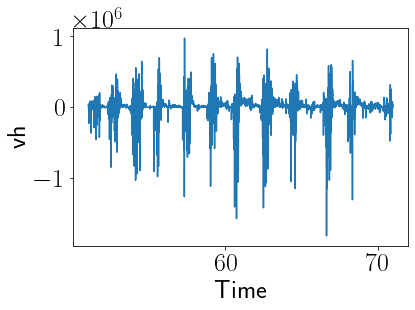

In [18]:
intrusions_arr.plot()
plt.title('')

In [19]:
dx = 10**3
dy = 10**3

In [20]:
#Calculating EKE using thickness weighted method
#waiting until last step before interpolating onto h grid

In [21]:
u_hat = (dsx_prog_daily.uh.isel(zl = 2).mean(dim = 'Time')/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'X').mean(dim = 'Time')
v_hat = (dsx_prog_daily.vh.isel(zl = 2).mean(dim = 'Time')/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = "extend").mean(dim = 'Time')

In [22]:
u_primed = (dsx_prog_daily.uh.isel(zl = 2)/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'X') - u_hat
v_primed = (dsx_prog_daily.vh.isel(zl = 2)/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = "extend") - v_hat

In [23]:
EKE = 1028.2*(dsx_prog_daily.h.isel(zl = 2) * (grid.interp(u_primed, axis = 'X')**2 + grid.interp(v_primed, axis = 'Y')**2)).sel(yh = range(-50,100), method = 'nearest')

In [209]:
EKE

<xarray.DataArray (Time: 7300, yh: 150, xh: 1000)>
dask.array<mul, shape=(7300, 150, 1000), dtype=float32, chunksize=(20, 150, 1000), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -49.5 -48.5 -47.5 -46.5 -45.5 ... 96.5 97.5 98.5 99.5
    zl       float64 1.028e+03
  * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5

In [24]:
EKE_u_interp = EKE.sum(dim = 'xh').sum(dim = 'yh')

In [25]:
EKE_u_interp_arr = EKE_u_interp.load()

Text(0.5, 1.0, '')

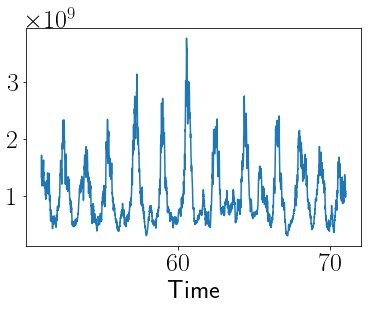

In [26]:
EKE_u_interp_arr.plot()
plt.title('')

In [6]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:38159': 73,
 'tcp://127.0.0.1:38265': 73,
 'tcp://127.0.0.1:43569': 73,
 'tcp://127.0.0.1:44293': 73}

In [11]:
import xrft
from dask.diagnostics import ProgressBar

In [29]:
### Timescale of Eddy Kinetic Energy/ASC strength

In [30]:
EKE_u_interp_arr.coords['Time'] = EKE_u_interp_arr.coords['Time'] * 365

In [31]:
EKE_u_interp_arr.coords['Time'] 

<xarray.DataArray 'Time' (Time: 7300)>
array([18615.5, 18616.5, 18617.5, ..., 25912.5, 25913.5, 25914.5])
Coordinates:
    zl       float64 1.028e+03
  * Time     (Time) float64 1.862e+04 1.862e+04 ... 2.591e+04 2.591e+04

In [32]:
with ProgressBar():
    #uhat2 = xrft.power_spectrum(grid.interp(u,'X')[:,0].chunk({'time':1}),
                             #dim=['XC','YC'], detrend='linear', window=True).compute()
    EKE_u_interp_arr_fft = xrft.power_spectrum(EKE_u_interp_arr,dim=['Time']).compute()
EKE_u_interp_arr_fft

<xarray.DataArray (freq_Time: 7300)>
array([7.79197613e+12, 1.65981561e+12, 5.94288182e+11, ...,
       1.34347595e+13, 5.94288182e+11, 1.65981561e+12])
Coordinates:
    zl         float64 1.028e+03
  * freq_Time  (freq_Time) float64 -0.5 -0.4999 -0.4997 ... 0.4996 0.4997 0.4999

(-1.0, 1.0)

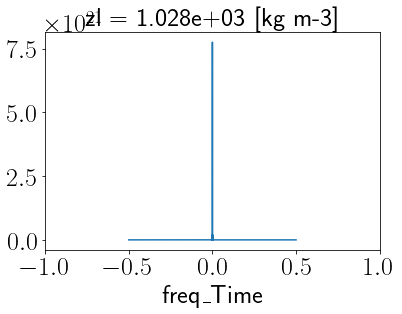

In [33]:
EKE_u_interp_arr_fft.plot()
plt.xlim([-1,1])

In [34]:
EKE_u_interp_arr_fft.coords['freq_Time'] = 1/EKE_u_interp_arr_fft.coords['freq_Time']

Text(0.5, 0, 'Period')

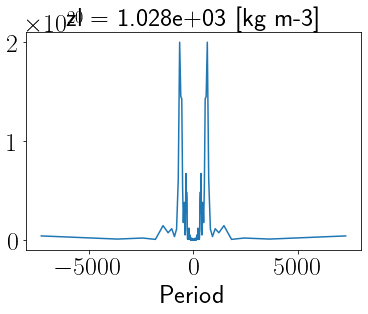

In [35]:
(EKE_u_interp_arr_fft).plot()
plt.xlabel('Period')

In [36]:
EKE_u_interp_arr_fft_single = EKE_u_interp_arr_fft.where(EKE_u_interp_arr_fft.coords['freq_Time'] > 0) * 2
EKE_u_interp_arr_fft_singleside = EKE_u_interp_arr_fft_single.where(EKE_u_interp_arr_fft_single.coords['freq_Time'] >= 0)

Text(0.5, 0, 'Period')

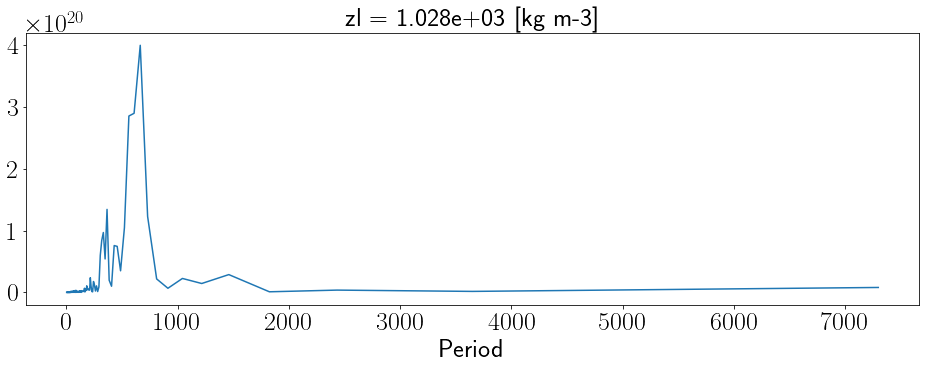

In [37]:
plt.figure(figsize=(16,5))
EKE_u_interp_arr_fft_singleside.plot()
plt.xlabel('Period')

(0.0, 1000.0)

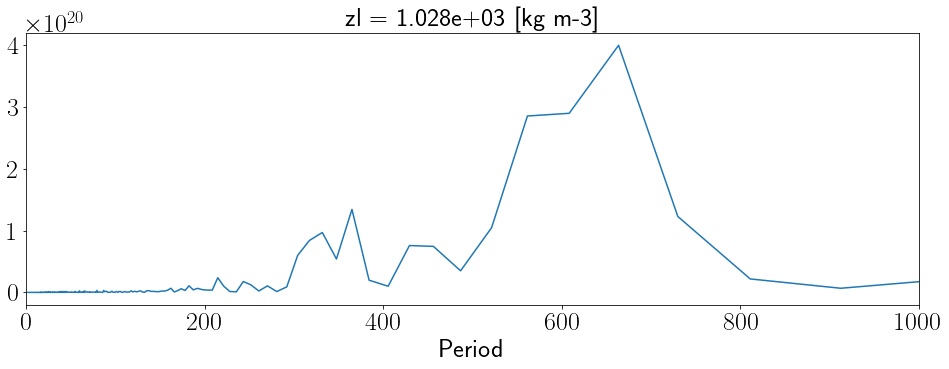

In [38]:
plt.figure(figsize=(16,5))
EKE_u_interp_arr_fft_singleside.plot()
plt.xlabel('Period')
plt.xlim([0,1000])

In [200]:
import math

In [202]:
auto_filter = EKE_u_interp_arr_fft_singleside.dropna(dim = 'freq_Time').where(np.isfinite(EKE_u_interp_arr_fft_singleside.coords['freq_Time']))

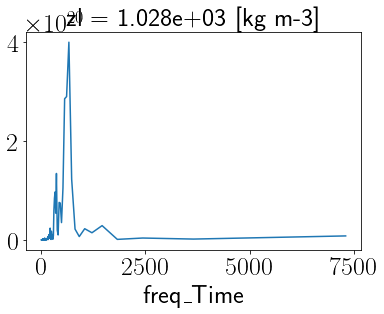

In [203]:
auto_filter.plot()

In [207]:
auto_filter.idxmax()

<xarray.DataArray 'freq_Time' ()>
array(663.63636364)
Coordinates:
    zl       float64 1.028e+03

In [205]:
auto_filter.argmax()

<xarray.DataArray ()>
array(11)
Coordinates:
    zl       float64 1.028e+03

In [ ]:
### filter out the weird infinite values from the higher periods

In [71]:
filter_EKE = EKE_u_interp_arr_fft_singleside.isel(freq_Time = range(3655,4000))
filter_EKE

<xarray.DataArray (freq_Time: 345)>
array([2.88138232e+19, 1.43987392e+19, 2.25700741e+19, 6.69126552e+18,
       2.17967935e+19, 1.22924715e+20, 4.00109858e+20, 2.90021193e+20,
       2.85604864e+20, 1.04803408e+20, 3.49663472e+19, 7.45144572e+19,
       7.58384776e+19, 9.97903973e+18, 1.97168009e+19, 1.34400448e+20,
       5.41364127e+19, 9.69609675e+19, 8.41433158e+19, 5.98370347e+19,
       8.92177152e+18, 1.36333922e+18, 1.05754771e+19, 2.24170132e+18,
       1.22356162e+19, 1.76191708e+19, 8.91137445e+17, 1.46589916e+18,
       1.03412384e+19, 2.37389455e+19, 3.75568716e+18, 3.67160769e+18,
       4.46708154e+18, 6.52866424e+18, 4.16997461e+18, 1.06548003e+19,
       3.12502264e+18, 5.91021429e+18, 2.82342282e+18, 6.71842183e+17,
       6.70626583e+18, 3.60878877e+18, 2.17698612e+18, 2.14602379e+18,
       1.28729998e+18, 1.15058853e+18, 1.69347506e+18, 1.50854624e+18,
       2.64890132e+18, 2.84154218e+18, 5.40291914e+16, 6.65562119e+17,
       2.52002803e+18, 1.73485570e+18, 9.08649941e+17, 1.86127154e+18,
       7.14622699e+17, 2.55078521e+18, 6.22721515e+17, 6.55503300e+17,
       4.13446717e+17, 1.51745582e+18, 3.99678806e+17, 9.22534612e+16,
       1.43610049e+18, 1.44297047e+18, 4.73756652e+16, 1.58027997e+18,
       3.45461672e+17, 2.78890254e+17, 2.80869611e+17, 1.89310423e+18,
       4.18877041e+17, 2.26410368e+17, 1.21809124e+17, 1.04808079e+17,
       1.89429515e+18, 1.68027810e+18, 1.11303759e+18, 3.25215470e+18,
...
       1.08594887e+17, 1.56967734e+17, 1.84023360e+17, 3.64154119e+17,
       2.23646349e+16, 1.46937826e+17, 6.66952736e+16, 1.32550039e+17,
       1.53135026e+17, 2.25087090e+16, 1.21086839e+17, 1.78065459e+17,
       4.18478997e+16, 6.62498182e+15, 8.67033477e+17, 8.77175726e+16,
       3.58395605e+17, 7.17333451e+16, 8.97755336e+16, 1.18333434e+17,
       1.00250714e+17, 1.04999334e+17, 5.11974216e+16, 5.42882639e+16,
       3.26677617e+16, 5.85705410e+16, 1.46513412e+16, 4.09653233e+17,
       1.75040906e+17, 4.43374303e+16, 8.88011583e+16, 1.68907703e+15,
       1.60086336e+17, 6.05396612e+16, 2.69268167e+17, 5.83546232e+16,
       4.69230932e+16, 1.09831272e+17, 8.77546092e+16, 5.11370661e+16,
       1.13986795e+17, 1.77750356e+17, 1.97389910e+17, 3.28062195e+16,
       1.28754015e+17, 5.22175263e+16, 1.49338896e+17, 5.29118873e+17,
       1.16249717e+17, 9.44074787e+16, 7.81105354e+16, 3.08038202e+16,
       8.57074251e+16, 3.49500754e+16, 2.04625235e+17, 1.96304642e+17,
       4.33896433e+16, 6.21023547e+16, 2.76331632e+16, 6.92504072e+16,
       1.56684736e+16, 5.69286493e+16, 6.56307302e+16, 1.91022714e+17,
       8.11711740e+15, 1.28504050e+16, 1.41555561e+17, 6.65368891e+16,
       1.36061378e+17, 1.28904687e+17, 1.02968513e+15, 3.76985995e+16,
       1.24593348e+16, 5.63540840e+16, 3.74622247e+16, 1.73472832e+17,
       8.42119824e+16])
Coordinates:
    zl         float64 1.028e+03
  * freq_Time  (freq_Time) float64 1.46e+03 1.217e+03 1.043e+03 ... 20.98 20.92

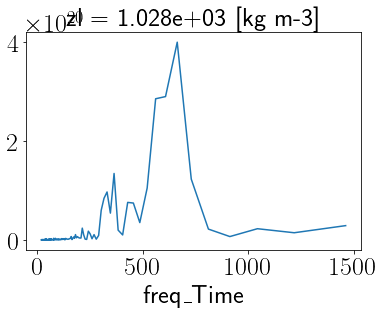

In [72]:
filter_EKE.plot() ## check that the region we want is still shown 

In [76]:
filter_EKE.idxmax().values ## find maximum period in time. 

array(663.63636364)

In [110]:
value = filter_EKE.idxmax().values ## find maximum period in time. 

In [112]:
array = np.zeros(4)
array[0] = value

In [113]:
array

array([663.63636364,   0.        ,   0.        ,   0.        ])

In [74]:
filter_EKE.argmax()

<xarray.DataArray ()>
array(6)
Coordinates:
    zl       float64 1.028e+03

In [75]:
filter_EKE.coords['freq_Time'][6] 

<xarray.DataArray 'freq_Time' ()>
array(663.63636364)
Coordinates:
    zl         float64 1.028e+03
    freq_Time  float64 663.6

In [63]:
filter_EKE.coords['freq_Time']

<xarray.DataArray 'freq_Time' (freq_Time: 350)>
array([        inf, 7300.      , 3650.      , ...,   21.037464,   20.977011,
         20.916905])
Coordinates:
    zl         float64 1.028e+03
  * freq_Time  (freq_Time) float64 inf 7.3e+03 3.65e+03 ... 21.04 20.98 20.92

### Start here

In [7]:
def timeseriesEKEspeed_surface(folder, t1, t2):
    import gc
    ## importing files
    FileList = [folder + 'output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(t1 ,t2)]
    dsx_prog_daily = xr.open_mfdataset(FileList, combine='by_coords', chunks={"Time": 20}, decode_times=False, preprocess = lambda d: d[['e', 'h','uh','vh']], engine='netcdf4', parallel=True)
    dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
    import xgcm
    grid = xr.open_mfdataset(folder+'output0*/ocean_geometry.nc', combine='by_coords')
    grid_new = grid.rename({'latq': 'yq','lonq': 'xq','lath': 'yh','lonh': 'xh'})
    ds = xr.merge([dsx_prog_daily.uh, dsx_prog_daily.vh, grid_new])

    ## making grid
    ds.coords['xh'].attrs.update(axis='X')
    ds.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
    ds.coords['yh'].attrs.update(axis='Y')
    ds.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

    grid = xgcm.Grid(ds, periodic=['X'])
    grid
    
    ### making EKE values
    dx = 10**3
    dy = 10**3
    
    u_hat = (dsx_prog_daily.uh.isel(zl = 0).mean(dim = 'Time')/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 0), axis = 'X').mean(dim = 'Time')
    v_hat = (dsx_prog_daily.vh.isel(zl = 0).mean(dim = 'Time')/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 0), axis = 'Y', boundary = "extend").mean(dim = 'Time')
    u_primed = ((dsx_prog_daily.uh.isel(zl = 0)/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 0), axis = 'X')) - u_hat
    v_primed = ((dsx_prog_daily.vh.isel(zl = 0)/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 0), axis = 'Y', boundary = "extend")) - v_hat
    c.run(gc.collect)

    EKE = 1028.2*((grid.interp(u_primed, axis = 'X')**2 + grid.interp(v_primed, axis = 'Y')**2)).sel(yh = range(-50,100), method = 'nearest')
    EKE_u_interp = EKE.sum(dim = 'xh').sum(dim = 'yh') #######
    print('timeseriesEKEspeed_surface loading ..')
    EKE_u_interp_arr = EKE_u_interp.load()
    print('timeseriesEKEspeed_surface loaded')
    c.run(gc.collect)
    
    EKE_u_interp_arr
    print('saved in ')
    return EKE_u_interp_arr

In [13]:
EKEspeed_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_halfg/',20,40)

EKE loading ..
EKE loaded
saved in 


In [14]:
EKEspeed_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


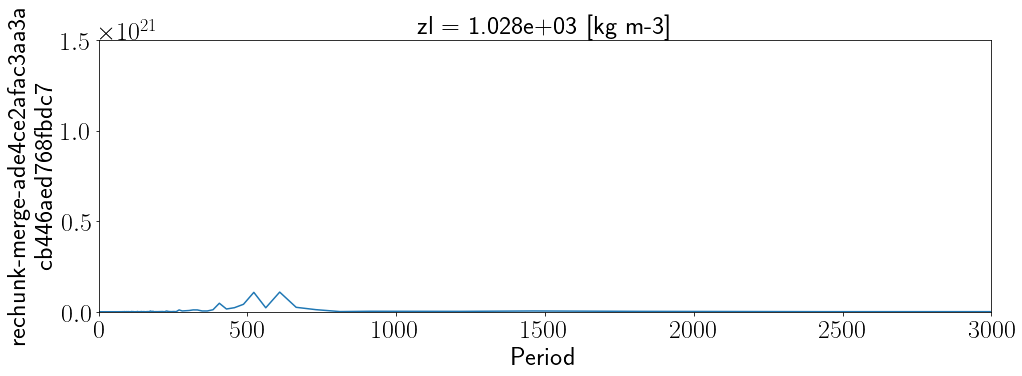

<xarray.DataArray 'freq_Time' ()>
array(608.33333333)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg.nc 608.3333333327801


array(608.33333333)

In [24]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg.nc')

In [17]:
EKEspeed_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular/',20,40)

EKE loading ..
EKE loaded
saved in 


In [20]:
EKEspeed_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular/',30,50)

EKE loading ..
EKE loaded
saved in 


In [21]:
EKEspeed_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


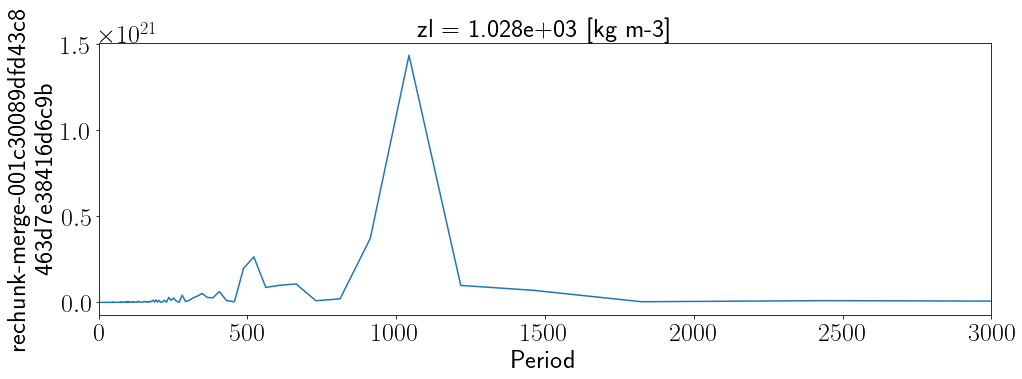

<xarray.DataArray 'freq_Time' ()>
array(1042.85714286)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular.nc 1042.857142857143


array(1042.85714286)

In [22]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


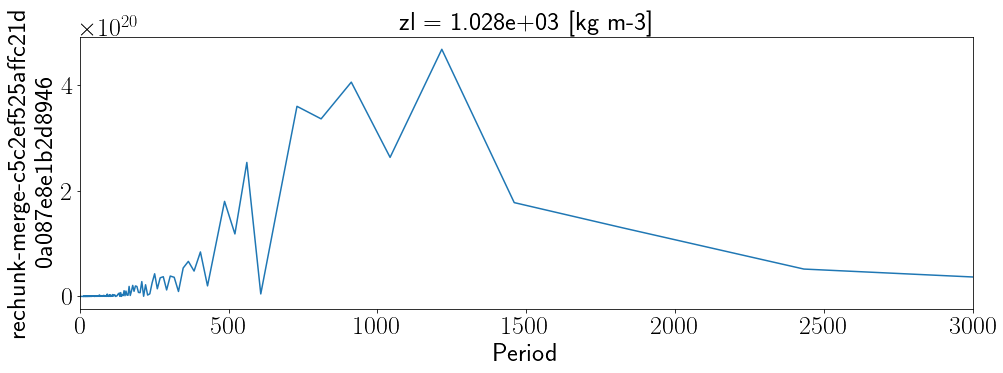

<xarray.DataArray 'freq_Time' ()>
array(1216.66666667)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular.nc 1216.6666666655601


array(1216.66666667)

In [19]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular.nc') # using 20-40 years for infinite

In [8]:
EKEspeed_u_interp_arr = timeseriesEKEspeed_surface('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_halfg/',20,40)

timeseriesEKEspeed_surface loading ..
timeseriesEKEspeed_surface loaded
saved in 


In [9]:
EKEspeed_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg_EKEspeed_surfaceTEST.nc')

In [24]:
EKEspeed_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg_EKEspeed_surface.nc')

In [15]:
EKEspeed_u_interp_arr = timeseriesEKEspeed_surface('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular/',30,50)

timeseriesEKEspeed_surface loading ..
timeseriesEKEspeed_surface loaded
saved in 


In [16]:
EKEspeed_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular_EKEspeed_surface.nc')

In [17]:
EKEspeed_u_interp_arr = timeseriesEKEspeed_surface('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular/',30,50)

timeseriesEKEspeed_surface loading ..
timeseriesEKEspeed_surface loaded
saved in 


In [18]:
EKEspeed_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_EKEspeed_surface.nc')

In [19]:
EKEspeed_u_interp_arr = timeseriesEKEspeed_surface('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_doubleg/',30,50)

timeseriesEKEspeed_surface loading ..
timeseriesEKEspeed_surface loaded
saved in 


In [20]:
EKEspeed_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_doubleg_EKEspeed_surface.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


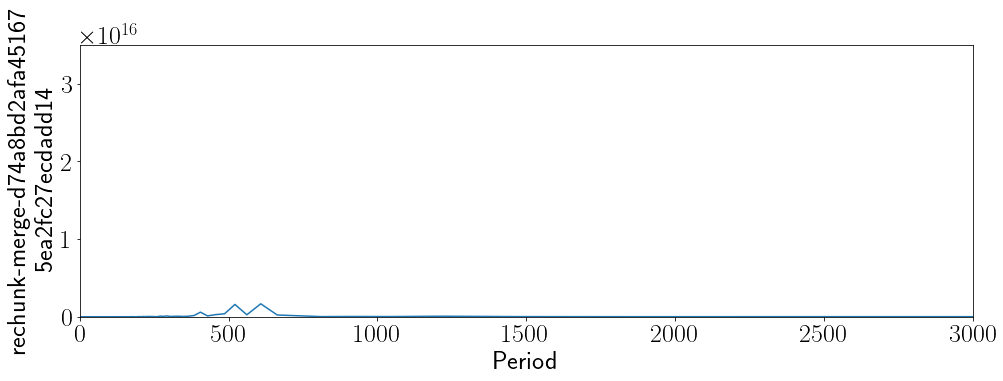

<xarray.DataArray 'freq_Time' ()>
array(608.33333333)
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg_EKEspeed_surface.nc 608.3333333327801


array(608.33333333)

In [29]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg_EKEspeed_surface.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


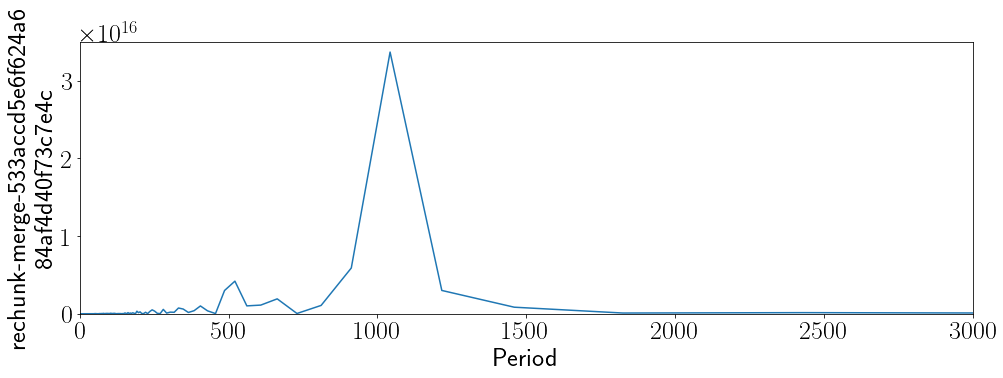

<xarray.DataArray 'freq_Time' ()>
array(1042.85714286)
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_EKEspeed_surface.nc 1042.857142857143


array(1042.85714286)

In [33]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_EKEspeed_surface.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


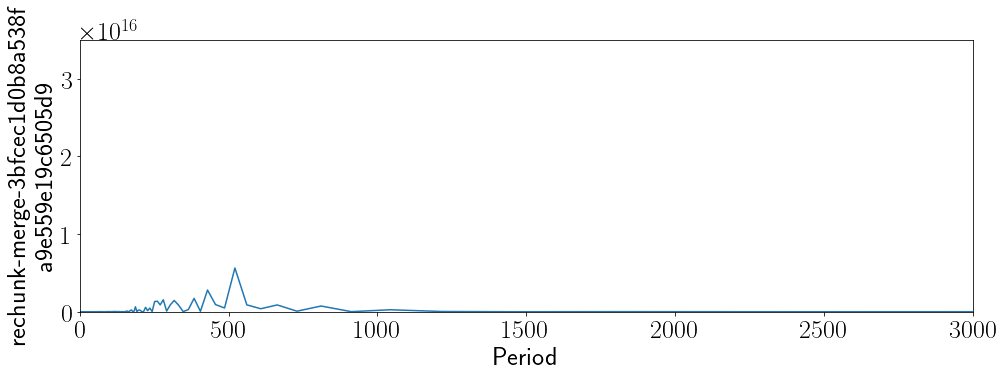

<xarray.DataArray 'freq_Time' ()>
array(521.42857143)
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular_EKEspeed_surface.nc 521.4285714285714


array(521.42857143)

In [34]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular_EKEspeed_surface.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


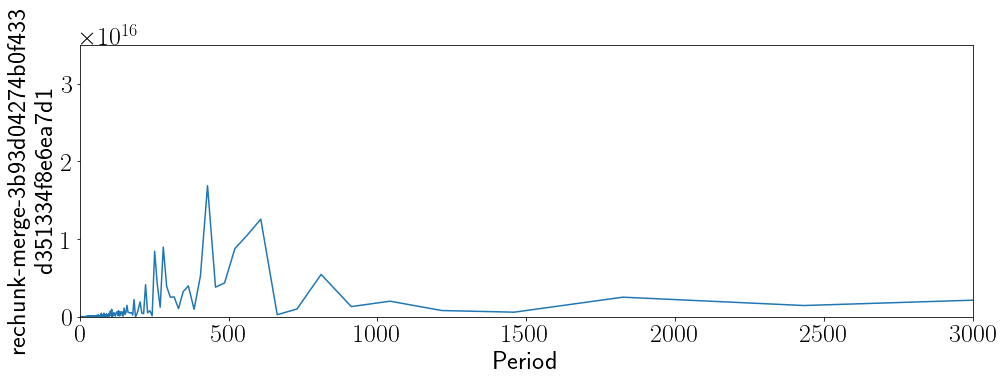

<xarray.DataArray 'freq_Time' ()>
array(429.41176471)
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_doubleg_EKEspeed_surface.nc 429.4117647058824


array(429.41176471)

In [35]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_doubleg_EKEspeed_surface.nc')

In [9]:
def timeseriesEKEspeed(folder, t1, t2):
    import gc
    ## importing files
    FileList = [folder + 'output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(t1 ,t2)]
    dsx_prog_daily = xr.open_mfdataset(FileList, combine='by_coords', chunks={"Time": 20}, decode_times=False, preprocess = lambda d: d[['e', 'h','uh','vh']], engine='netcdf4', parallel=True)
    dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
    import xgcm
    grid = xr.open_mfdataset(folder+'output0*/ocean_geometry.nc', combine='by_coords')
    grid_new = grid.rename({'latq': 'yq','lonq': 'xq','lath': 'yh','lonh': 'xh'})
    ds = xr.merge([dsx_prog_daily.uh, dsx_prog_daily.vh, grid_new])

    ## making grid
    ds.coords['xh'].attrs.update(axis='X')
    ds.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
    ds.coords['yh'].attrs.update(axis='Y')
    ds.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

    grid = xgcm.Grid(ds, periodic=['X'])
    grid
    
    ### making EKE values
    dx = 10**3
    dy = 10**3
    
    u_hat = (dsx_prog_daily.uh.isel(zl = 2).mean(dim = 'Time')/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'X').mean(dim = 'Time')
    v_hat = (dsx_prog_daily.vh.isel(zl = 2).mean(dim = 'Time')/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = "extend").mean(dim = 'Time')
    u_primed = (dsx_prog_daily.uh.isel(zl = 2)/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'X') - u_hat
    v_primed = (dsx_prog_daily.vh.isel(zl = 2)/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = "extend") - v_hat
    c.run(gc.collect)

    EKE = 1028.2*((grid.interp(u_primed, axis = 'X')**2 + grid.interp(v_primed, axis = 'Y')**2)).sel(yh = range(-50,100), method = 'nearest')
    EKE_u_interp = EKE.sum(dim = 'xh').sum(dim = 'yh')
    print('EKEspeed loading ..')
    EKE_u_interp_arr = EKE_u_interp.load()
    print('EKEspeed loaded')
    c.run(gc.collect)
    
    EKE_u_interp_arr
    print('saved in ')
    return EKE_u_interp_arr

In [30]:
EKEspeed_u_interp_arr = timeseriesEKEspeed('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_halfg/', 20,40)
EKEspeed_u_interp_arr.to_netcdf('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg_EKEspeed.nc')

EKEspeed loading ..
EKEspeed loaded
saved in 


In [27]:
EKEspeed_u_interp_arr = timeseriesEKEspeed('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular/',30,50)

EKEspeed loading ..
EKEspeed loaded
saved in 


In [28]:
EKEspeed_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular_EKEspeed.nc')

In [19]:
EKEspeed_u_interp_arr = timeseriesEKEspeed('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular/',30,50)

EKEspeed loading ..
EKEspeed loaded
saved in 


In [20]:
EKEspeed_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_EKEspeed.nc')

In [8]:
EKEspeed_u_interp_arr = timeseriesEKEspeed('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_doubleg/',30,50)

EKEspeed loading ..
EKEspeed loaded
saved in 


In [9]:
EKEspeed_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_doubleg_EKEspeed.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


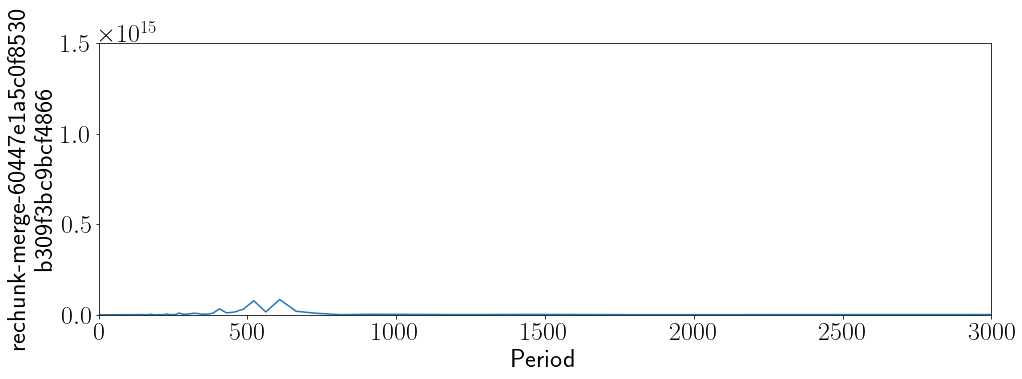

<xarray.DataArray 'freq_Time' ()>
array(608.33333333)
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg_EKEspeed.nc 608.3333333327801


array(608.33333333)

In [32]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg_EKEspeed.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


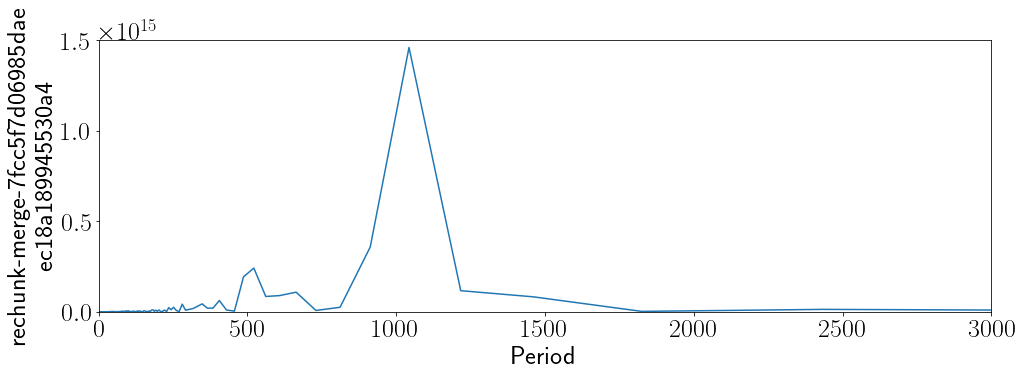

<xarray.DataArray 'freq_Time' ()>
array(1042.85714286)
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_EKEspeed.nc 1042.857142857143


array(1042.85714286)

In [24]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_EKEspeed.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


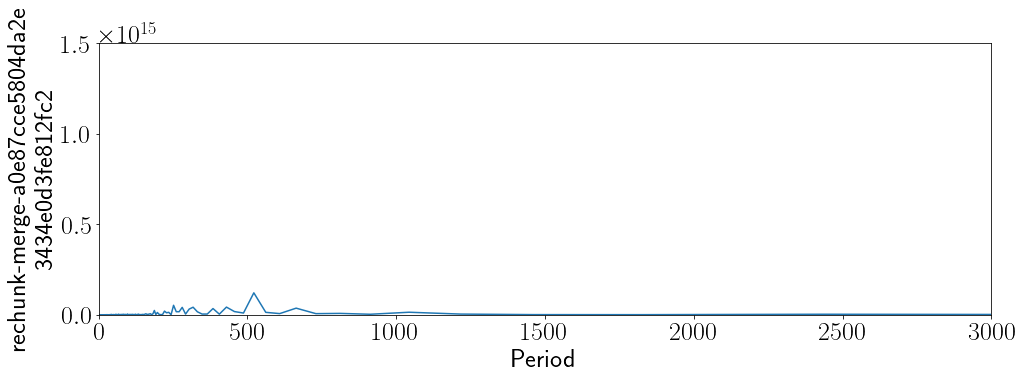

<xarray.DataArray 'freq_Time' ()>
array(521.42857143)
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular_EKEspeed.nc 521.4285714285714


array(521.42857143)

In [25]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular_EKEspeed.nc')

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


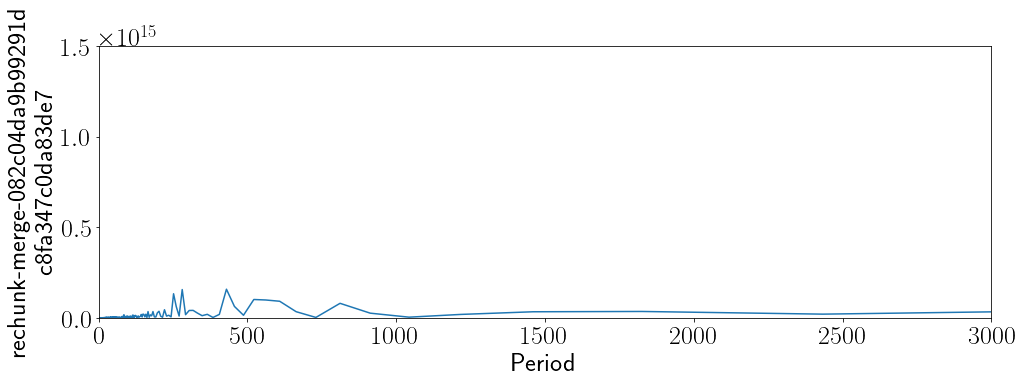

<xarray.DataArray 'freq_Time' ()>
array(429.41176471)
4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_doubleg_EKEspeed.nc 429.4117647058824


array(429.41176471)

In [26]:
fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_doubleg_EKEspeed.nc')

In [12]:
def timeseriesEKE(folder, t1, t2):
    import gc
    ## importing files
    FileList = [folder + 'output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(t1 ,t2)]
    dsx_prog_daily = xr.open_mfdataset(FileList, combine='by_coords', chunks={"Time": 20}, decode_times=False, preprocess = lambda d: d[['e', 'h','uh','vh']], engine='netcdf4', parallel=True)
    dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
    import xgcm
    grid = xr.open_mfdataset(folder+'output0*/ocean_geometry.nc', combine='by_coords')
    grid_new = grid.rename({'latq': 'yq','lonq': 'xq','lath': 'yh','lonh': 'xh'})
    ds = xr.merge([dsx_prog_daily.uh, dsx_prog_daily.vh, grid_new])

    ## making grid
    ds.coords['xh'].attrs.update(axis='X')
    ds.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
    ds.coords['yh'].attrs.update(axis='Y')
    ds.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

    grid = xgcm.Grid(ds, periodic=['X'])
    grid
    
    ### making EKE values
    dx = 10**3
    dy = 10**3
    
    u_hat = (dsx_prog_daily.uh.isel(zl = 2).mean(dim = 'Time')/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'X').mean(dim = 'Time')
    v_hat = (dsx_prog_daily.vh.isel(zl = 2).mean(dim = 'Time')/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = "extend").mean(dim = 'Time')
    u_primed = (dsx_prog_daily.uh.isel(zl = 2)/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'X') - u_hat
    v_primed = (dsx_prog_daily.vh.isel(zl = 2)/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = "extend") - v_hat
    c.run(gc.collect)

    EKE = 1028.2*(dsx_prog_daily.h.isel(zl = 2) * (grid.interp(u_primed, axis = 'X')**2 + grid.interp(v_primed, axis = 'Y')**2)).sel(yh = range(-50,100), method = 'nearest')
    EKE_u_interp = EKE.sum(dim = 'xh').sum(dim = 'yh')
    print('EKE loading ..')
    EKE_u_interp_arr = EKE_u_interp.load()
    print('EKE loaded')
    c.run(gc.collect)
    
    EKE_u_interp_arr
    print('saved in ')
    return EKE_u_interp_arr

In [10]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular/',30,50)

EKE loading ..
EKE loaded
saved in 


In [11]:
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular.nc')

In [58]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular/',30,50)

EKE loading ..
EKE loaded
saved in 


In [59]:
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular.nc')

In [21]:
EKE_u_interp_arr= timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/', 51,71)

EKE loading ..
EKE loaded
saved in 


In [22]:
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc')

In [19]:
EKE_u_interp_arr= timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag1p5e-03/', 20,40)

EKE loading ..
EKE loaded
saved in 


In [20]:
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag1p5e-03.nc')

In [15]:
EKE_u_interp_arr= timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag2p4e-03/', 20,40)

EKE loading ..
EKE loaded
saved in 


In [16]:
EKE_u_interp_arr

<xarray.DataArray (Time: 7300)>
array([7.8606042e+08, 7.7095974e+08, 7.6901466e+08, ..., 4.5098675e+08,
       4.7320346e+08, 4.8485706e+08], dtype=float32)
Coordinates:
    zl       float64 1.028e+03
  * Time     (Time) float64 20.0 20.0 20.01 20.01 ... 39.99 39.99 40.0 40.0

In [17]:
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag2p4e-03.nc')

In [ ]:
EKE_u_interp_arr= timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag3p6e-03/', 20,40)

In [ ]:
EKE_u_interp_arr

In [ ]:
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag3p6e-03.nc')

In [18]:
EKE_u_interp_arr= timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag4p5e-03/', 20,40)

EKE loading ..
EKE loaded
saved in 


In [19]:
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag4p5e-03.nc')

In [20]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:35899': 99,
 'tcp://127.0.0.1:38881': 123,
 'tcp://127.0.0.1:43119': 181,
 'tcp://127.0.0.1:44427': 94}

In [ ]:
EKE_u_interp_arr= timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03/', 20,40)

In [18]:
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03.nc')

In [ ]:
#canyon_width_exp 

In [ ]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/', 51,101)
EKE_u_interp_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc')

In [ ]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01/', 30,80)
EKE_u_interp_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01.nc')

In [ ]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01/', 30,80)
EKE_u_interp_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01.nc')

In [ ]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01/', 30,80)
EKE_u_interp_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01.nc')

In [ ]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/', 30,80)
EKE_u_interp_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01.nc')

In [16]:
import netCDF4 as nc
import gc

In [23]:
def fft_period_max_EKE_nc(filename):
    #Extract dominant period in EKE time series
    import gc
    ## importing files
    print(filename)
    EKE_u_interp_arr = xr.open_mfdataset(filename, combine='by_coords',decode_times=False, engine='netcdf4', parallel=True) #, decode_times=False,    c.run(gc.collect)
    print(EKE_u_interp_arr)
    ### fft EKE values
    EKE_u_interp_arr.coords['Time'] = EKE_u_interp_arr.coords['Time'] * 365
    EKE_u_interp_arr_fft = xrft.power_spectrum(EKE_u_interp_arr.__xarray_dataarray_variable__,dim=['Time']).compute()
    EKE_u_interp_arr_fft.coords['freq_Time'] = 1/EKE_u_interp_arr_fft.coords['freq_Time']
    EKE_u_interp_arr_fft_single = EKE_u_interp_arr_fft.where(EKE_u_interp_arr_fft.coords['freq_Time'] > 0) * 2
    EKE_u_interp_arr_fft_singleside = EKE_u_interp_arr_fft_single.where(EKE_u_interp_arr_fft_single.coords['freq_Time'] >= 0)
    
    c.run(gc.collect)

    #p1 and p2 define the range of periods the maximum can be selected from - avoids problems with inf values
    filter_EKE = EKE_u_interp_arr_fft_singleside.dropna(dim = 'freq_Time').where(np.isfinite(EKE_u_interp_arr_fft_singleside.coords['freq_Time'])) #EKE_u_interp_arr_fft_singleside.isel(freq_Time = range(p1,p2))
    plt.figure(figsize=(16,5))
    filter_EKE.plot()
    plt.xlabel('Period')
    plt.xlim([0,3000])
    plt.ylim([0,1.5e21]) #3.5e16
    plt.show()
    print(filter_EKE.idxmax())
    EKE_max_period = filter_EKE.idxmax().values
    print(filename, EKE_max_period)
    del EKE_u_interp_arr
    return EKE_max_period

In [13]:
# save dominant period of oscillaiton in CDW. 
fn = '/g/data/v45/qo9901/period_CDW_drag_EKE_full.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [14]:
cdrag_exp = ds.createDimension('cdrag_exp',6)
cdrag_exps = ds.createVariable('cdrag_exp', 'f4', ('cdrag_exp',))
value = ds.createVariable('value', 'f4', ('cdrag_exp',))

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


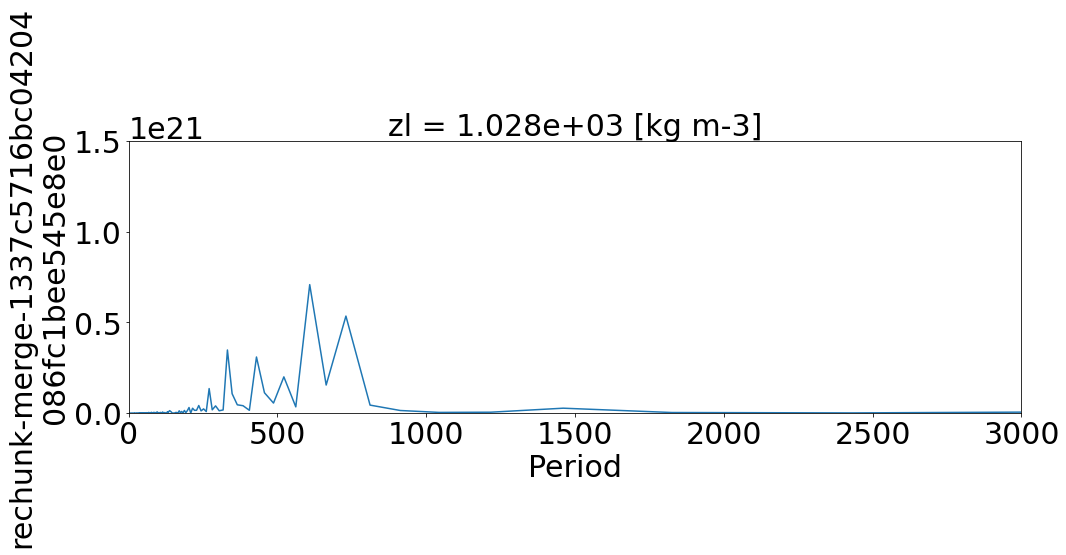

<xarray.DataArray 'freq_Time' ()>
array(608.33333333)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag1p5e-03.nc 608.3333333327801
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


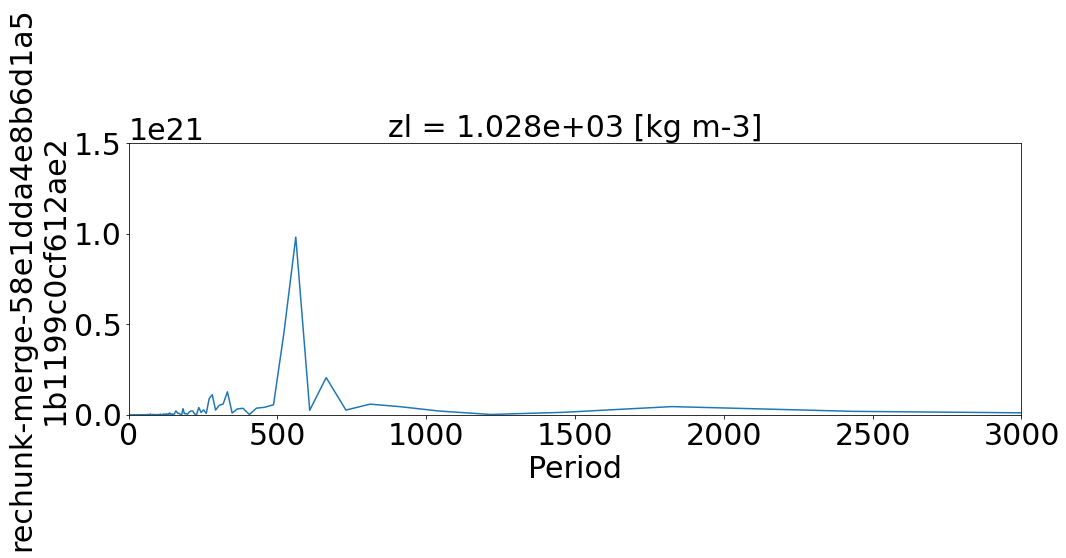

<xarray.DataArray 'freq_Time' ()>
array(561.53846154)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag2p4e-03.nc 561.5384615379508
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 51.0 51.0 51.01 ... 71.0 71.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


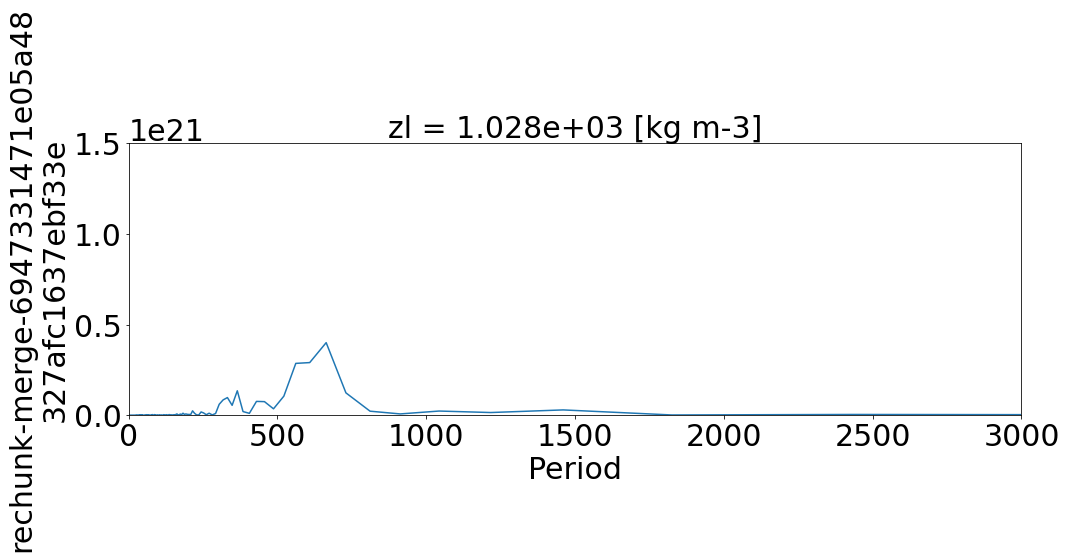

<xarray.DataArray 'freq_Time' ()>
array(663.63636364)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc 663.6363636363637
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


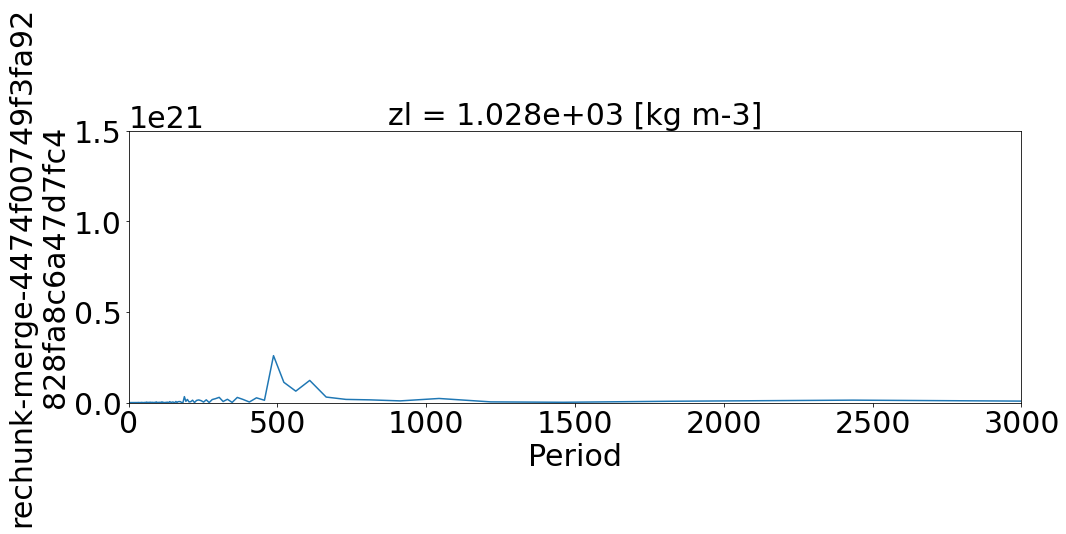

<xarray.DataArray 'freq_Time' ()>
array(486.66666667)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag3p6e-03.nc 486.666666666224
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


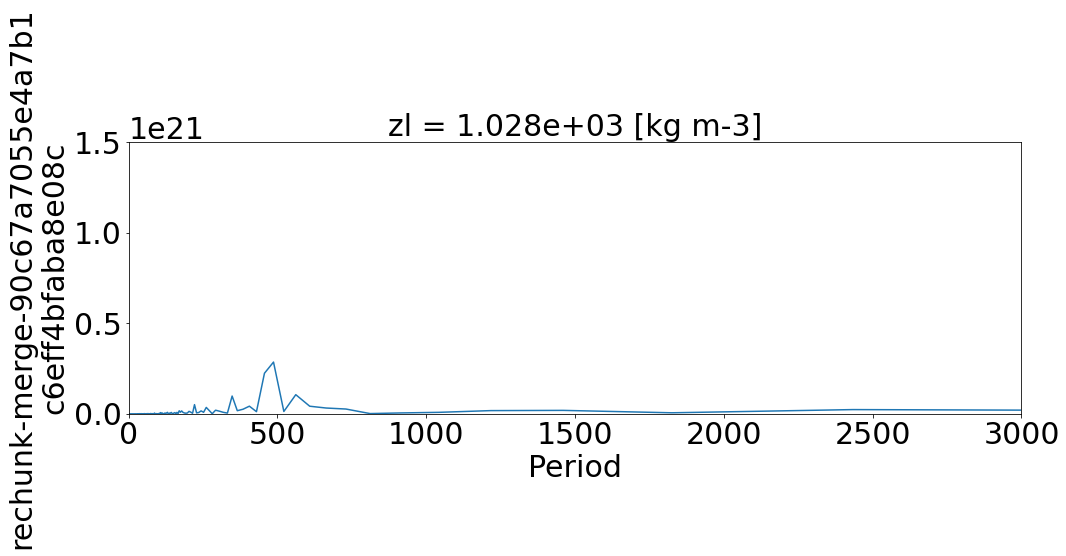

<xarray.DataArray 'freq_Time' ()>
array(486.66666667)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag4p5e-03.nc 486.666666666224
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


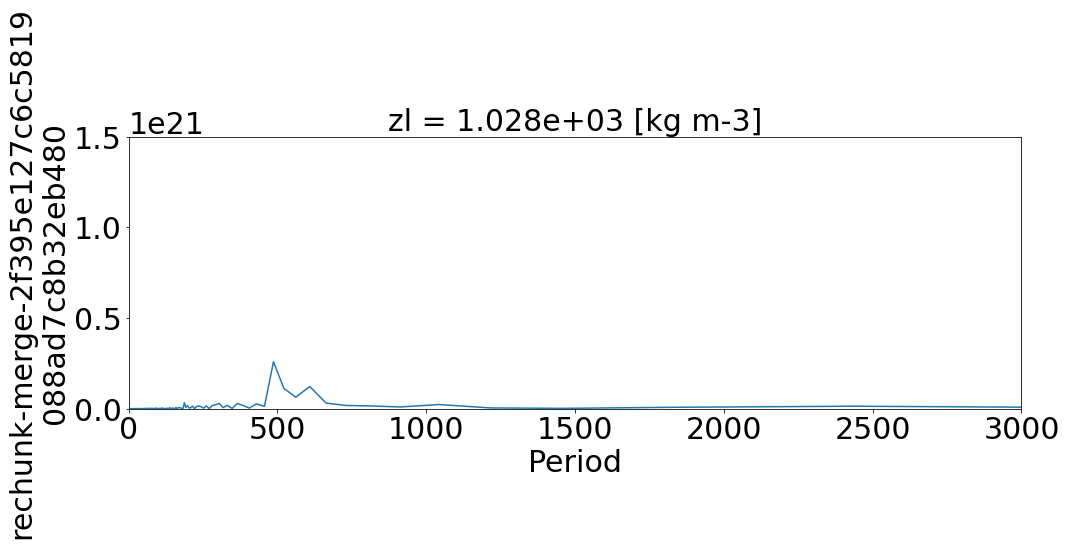

<xarray.DataArray 'freq_Time' ()>
array(486.66666667)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03.nc 486.666666666224


In [18]:
value[0] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag1p5e-03.nc')
c.run(gc.collect)
value[1] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag2p4e-03.nc')
c.run(gc.collect)
value[2] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc')
c.run(gc.collect)
value[3] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag3p6e-03.nc')
c.run(gc.collect)
value[4] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag4p5e-03.nc')
c.run(gc.collect)
value[5] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03.nc')


In [19]:
ds.close()

In [8]:
EKE_u_interp_arr= timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02/', 30,50)
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02.nc')

EKE loading ..
EKE loaded
saved in 


In [48]:
EKE_u_interp_arr= timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02/', 20,40)
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02.nc')

EKE loading ..
EKE loaded
saved in 


In [49]:
EKE_u_interp_arr= timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02/', 20,40)
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02.nc')

EKE loading ..
EKE loaded
saved in 


In [9]:
EKE_u_interp_arr= timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p2e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/', 20,40)
EKE_u_interp_arr.to_netcdf(path='4layer_fresh_tau1p2e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc')

EKE loading ..
EKE loaded
saved in 


In [103]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01/', 30,50)
EKE_u_interp_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01.nc')


EKE loading ..
EKE loaded
saved in 


In [104]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01/', 30,50)
EKE_u_interp_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01.nc')


EKE loading ..
EKE loaded
saved in 


In [106]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01/', 30,50)
EKE_u_interp_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01.nc')


EKE loading ..
EKE loaded
saved in 


In [107]:
EKE_u_interp_arr = timeseriesEKE('/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01/', 30,50)
EKE_u_interp_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01.nc')

EKE loading ..
EKE loaded
saved in 


In [23]:
import netCDF4 as nc

In [111]:
fn = '/g/data/v45/qo9901/period_CDW_canyonwidth_EKE.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [112]:
canyonwidth = ds.createDimension('canyonwidth',5)
canyonwidth = ds.createVariable('canyonwidth', 'f4', ('canyonwidth',))
value = ds.createVariable('value', 'f4', ('canyonwidth',))

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 51.0 51.0 51.01 ... 71.0 71.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


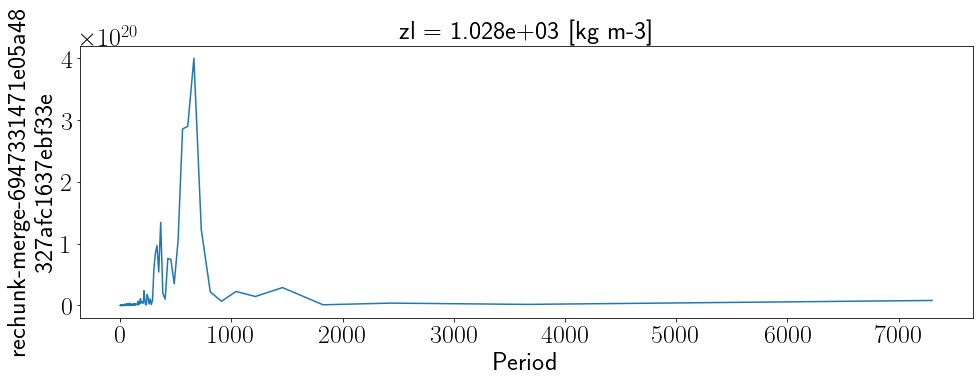

<xarray.DataArray 'freq_Time' ()>
array(663.63636364)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc 663.6363636363637
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


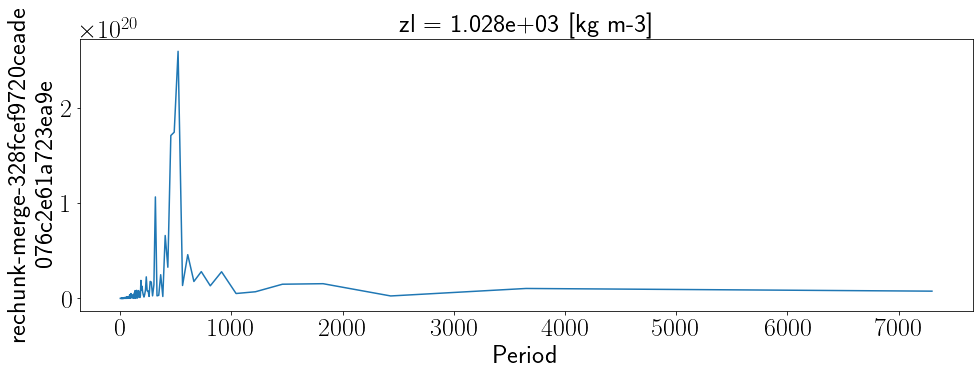

<xarray.DataArray 'freq_Time' ()>
array(521.42857143)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01.nc 521.4285714285714
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


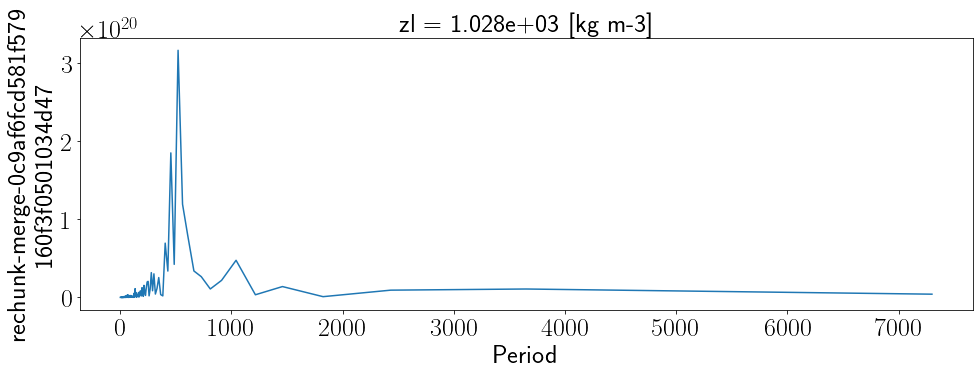

<xarray.DataArray 'freq_Time' ()>
array(521.42857143)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01.nc 521.4285714285714
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


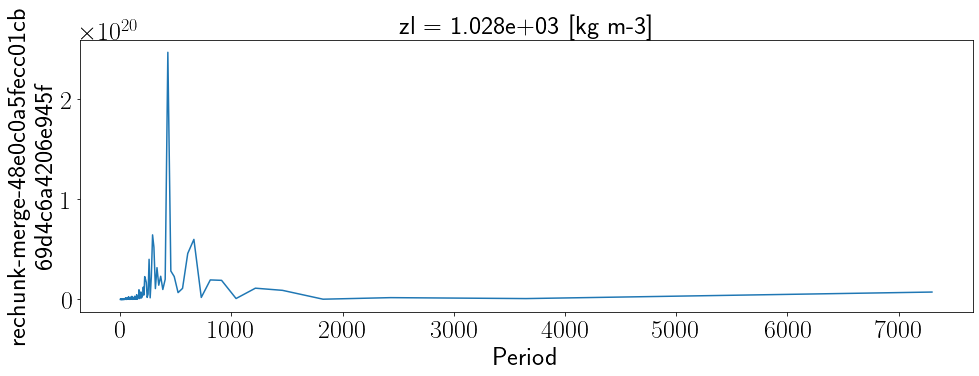

<xarray.DataArray 'freq_Time' ()>
array(429.41176471)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01.nc 429.4117647058824
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


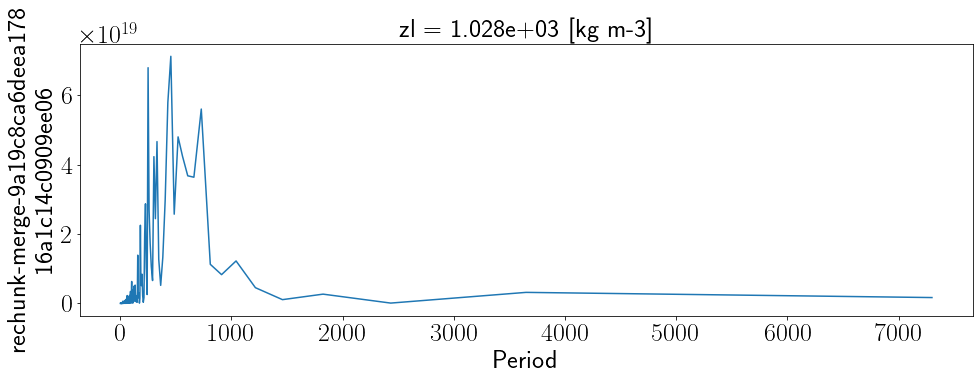

<xarray.DataArray 'freq_Time' ()>
array(456.25)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01.nc 456.25000000000006


In [118]:
value[0] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc')
import gc
c.run(gc.collect)
value[1] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig7p5e+01.nc')
c.run(gc.collect)
value[2] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01.nc')
c.run(gc.collect)
value[3] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig2p5e+01.nc')
c.run(gc.collect)
value[4] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01.nc')


In [119]:
ds.close()

In [20]:
fn = '/g/data/v45/qo9901/period_CDW_wind_EKE_full.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [25]:
wind_exp = ds.createDimension('wind_exp',5)
wind_exps = ds.createVariable('wind_exp', 'f4', ('wind_exp',))
value = ds.createVariable('value', 'f4', ('wind_exp',))

4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02.nc
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


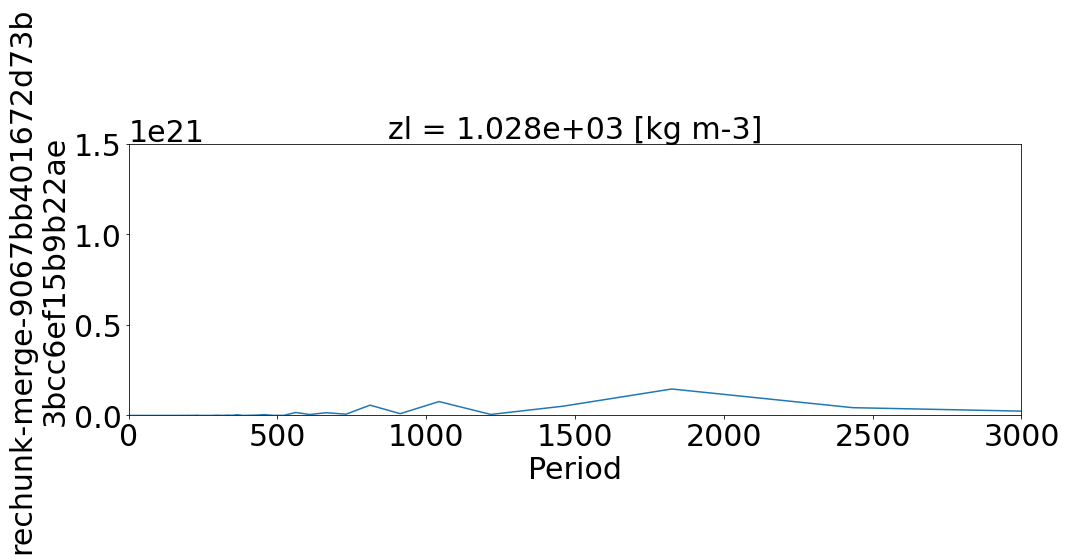

<xarray.DataArray 'freq_Time' ()>
array(1825.)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02.nc 1825.0000000000002
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02.nc
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


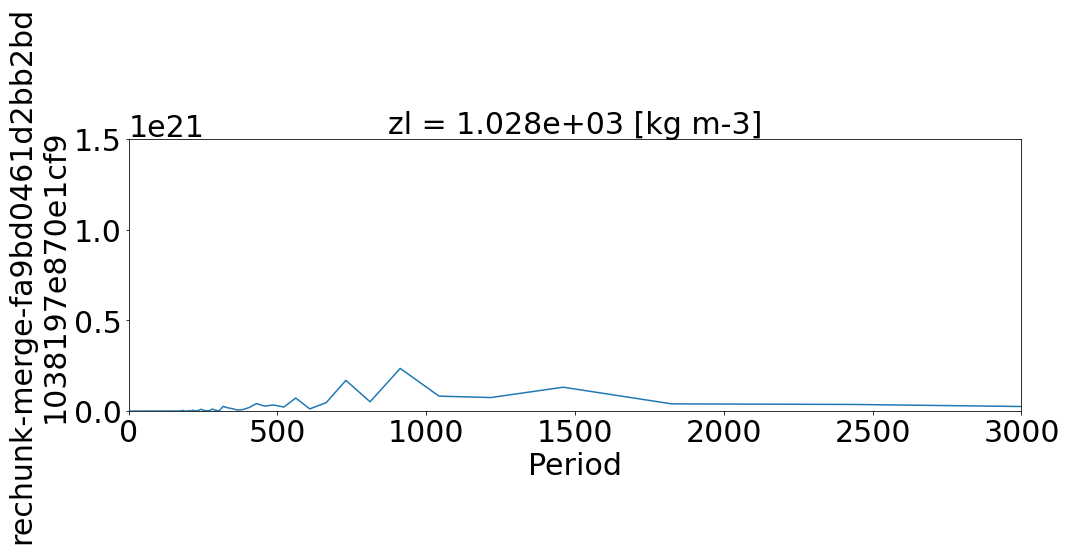

<xarray.DataArray 'freq_Time' ()>
array(912.5)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02.nc 912.4999999991701
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02.nc
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


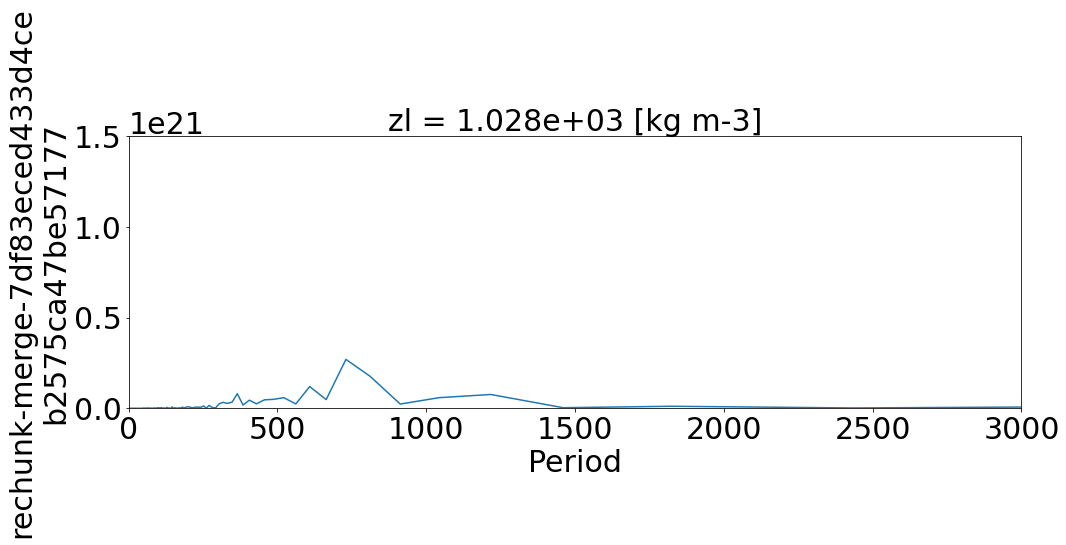

<xarray.DataArray 'freq_Time' ()>
array(730.)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02.nc 729.9999999993361
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc


2023-03-17 13:22:03,786 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 51.0 51.0 51.01 ... 71.0 71.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


2023-03-17 13:22:04,053 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-17 13:22:04,057 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-17 13:22:04,068 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-17 13:22:04,078 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


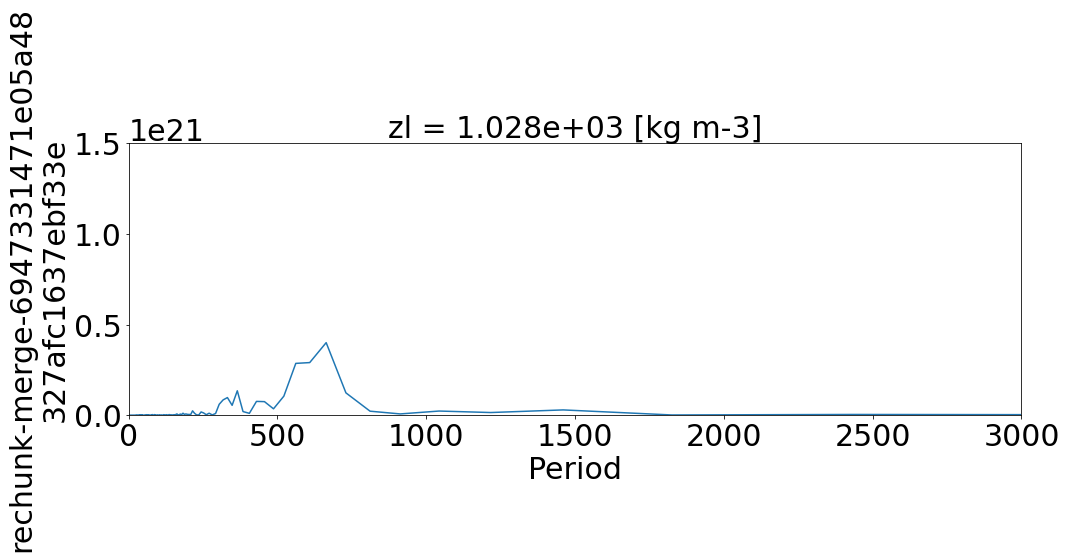

<xarray.DataArray 'freq_Time' ()>
array(663.63636364)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc 663.6363636363637
4layer_fresh_tau1p2e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc


2023-03-17 13:22:04,346 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-17 13:22:04,369 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-17 13:22:04,375 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-17 13:22:04,388 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


2023-03-17 13:22:04,727 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-17 13:22:04,739 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-17 13:22:04,771 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-17 13:22:04,781 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


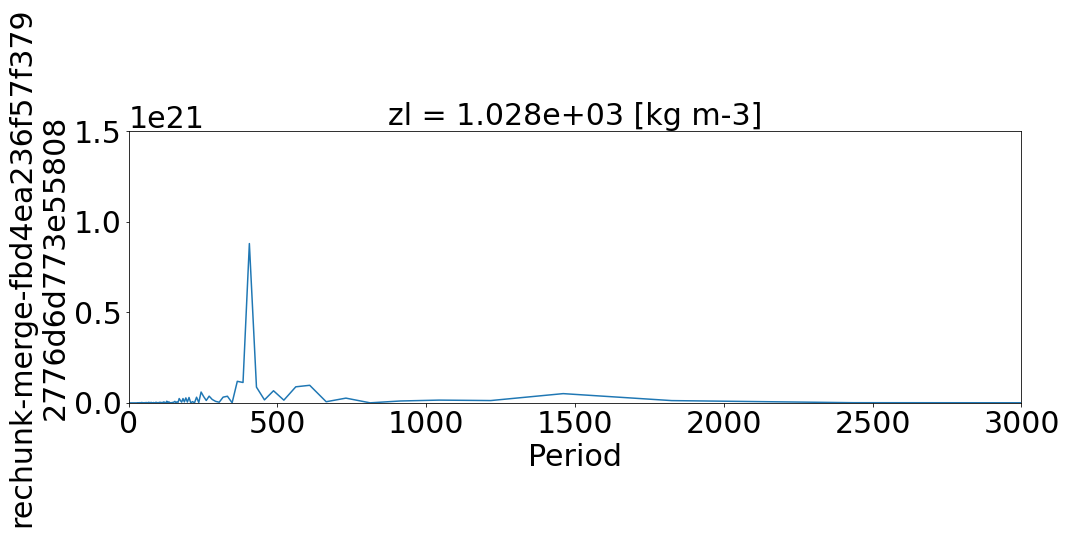

<xarray.DataArray 'freq_Time' ()>
array(405.55555556)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p2e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc 405.55555555518674


In [27]:
value[0] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02.nc')
c.run(gc.collect)
value[1] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02.nc')
c.run(gc.collect)
value[2] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02.nc')
c.run(gc.collect)
value[3] = fft_period_max_EKE_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc')
c.run(gc.collect)
value[4] = fft_period_max_EKE_nc('4layer_fresh_tau1p2e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc')

In [28]:
ds.close()

In [22]:
def fft_period_max_totalenergy_nc(filename,filenameAPE):
    import gc
    ## importing files
    EKE_u_interp_arr = xr.open_mfdataset(filename, combine='by_coords',decode_times=False, engine='netcdf4', parallel=True) #, decode_times=False,    c.run(gc.collect)
    print(EKE_u_interp_arr)
    ### fft EKE values
    EKE_u_interp_arr.coords['Time'] = EKE_u_interp_arr.coords['Time'] * 365
    APE_interp_arr = xr.open_mfdataset(filenameAPE, combine='by_coords',decode_times=False, engine='netcdf4', parallel=True) #, decode_times=False,    c.run(gc.collect)
    APE_interp_arr.coords['Time'] = APE_interp_arr.coords['Time'] * 365
    energy_interp_arr = APE_interp_arr + EKE_u_interp_arr
    energy_interp_arr_fft = xrft.power_spectrum(EKE_u_interp_arr.__xarray_dataarray_variable__,dim=['Time']).compute()
    energy_interp_arr_fft.coords['freq_Time'] = 1/energy_interp_arr_fft.coords['freq_Time']
    energy_interp_arr_fft_single = energy_interp_arr_fft.where(energy_interp_arr_fft.coords['freq_Time'] > 0) * 2
    energy_interp_arr_fft_singleside = energy_interp_arr_fft_single.where(energy_interp_arr_fft_single.coords['freq_Time'] >= 0)
    
    c.run(gc.collect)

    #p1 and p2 define the range of periods the maximum can be selected from - avoids problems with inf values
    filter_energy = energy_interp_arr_fft_singleside.dropna(dim = 'freq_Time').where(np.isfinite(energy_interp_arr_fft_singleside.coords['freq_Time'])) #EKE_u_interp_arr_fft_singleside.isel(freq_Time = range(p1,p2))
    plt.figure(figsize=(16,5))
    filter_energy.plot()
    plt.xlabel('Period')
    plt.show()
    print(filter_energy.idxmax())
    energy_max_period = filter_energy.idxmax().values
    print(filename, energy_max_period)
    del energy_interp_arr
    return energy_max_period

In [24]:
fn = '/g/data/v45/qo9901/period_CDW_wind_totalenergy.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [25]:
wind_exp = ds.createDimension('wind_exp',4)
wind_exps = ds.createVariable('wind_exp', 'f4', ('wind_exp',))
value = ds.createVariable('value', 'f4', ('wind_exp',))

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


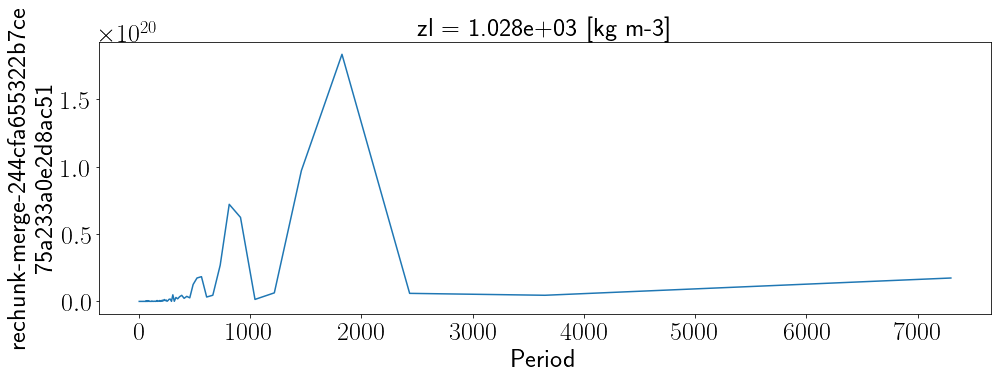

<xarray.DataArray 'freq_Time' ()>
array(1825.)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02.nc 1824.9999999983402
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


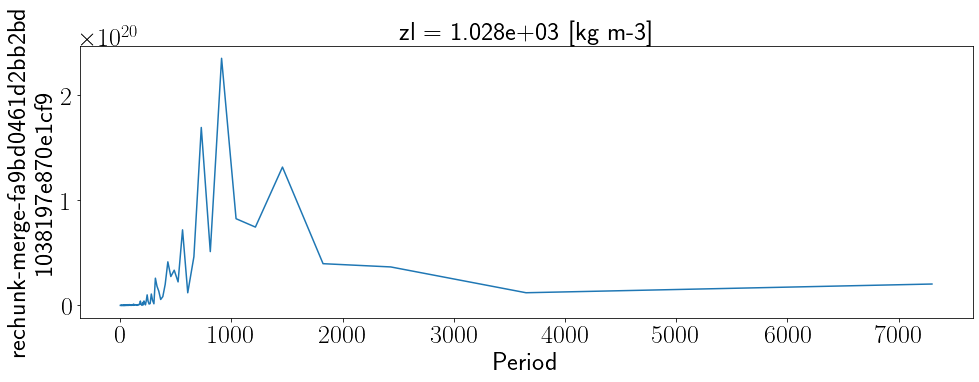

<xarray.DataArray 'freq_Time' ()>
array(912.5)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02.nc 912.4999999991701
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


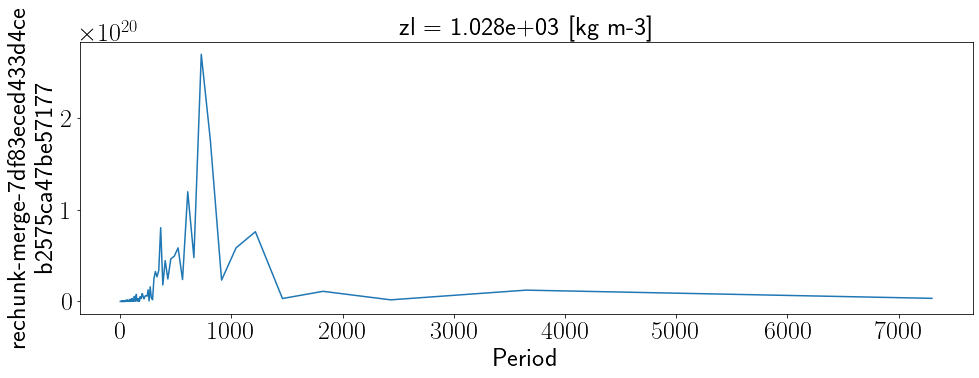

<xarray.DataArray 'freq_Time' ()>
array(730.)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02.nc 729.9999999993361
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 51.0 51.0 51.01 ... 71.0 71.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


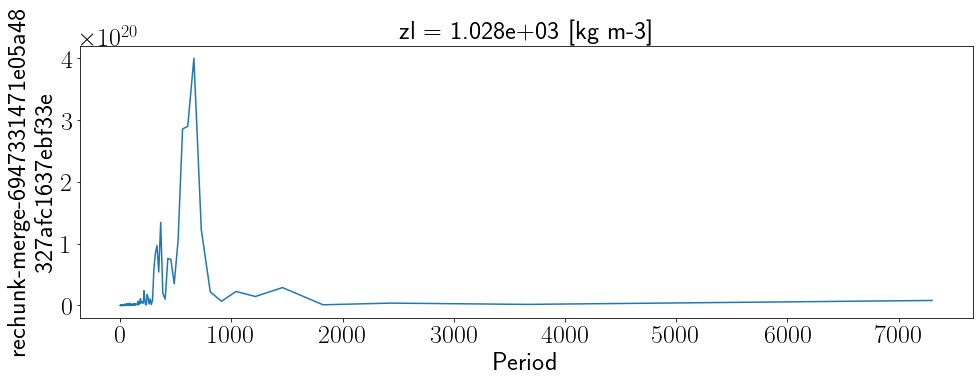

<xarray.DataArray 'freq_Time' ()>
array(663.63636364)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc 663.6363636363637


In [40]:
value[0] = fft_period_max_totalenergy_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02.nc', '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02_APE.nc')
c.run(gc.collect)
value[1] = fft_period_max_totalenergy_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02.nc', '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02_APE.nc')
c.run(gc.collect)
value[2] = fft_period_max_totalenergy_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02.nc', '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02_APE.nc')
c.run(gc.collect)
value[3] = fft_period_max_totalenergy_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc', '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_APE.nc')


In [41]:
ds.close()

In [43]:
fn = '/g/data/v45/qo9901/period_CDW_drag_totalenergy.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [44]:
cdrag_exp = ds.createDimension('cdrag_exp',4)
cdrag_exps = ds.createVariable('cdrag_exp', 'f4', ('cdrag_exp',))
value = ds.createVariable('value', 'f4', ('cdrag_exp',))

<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


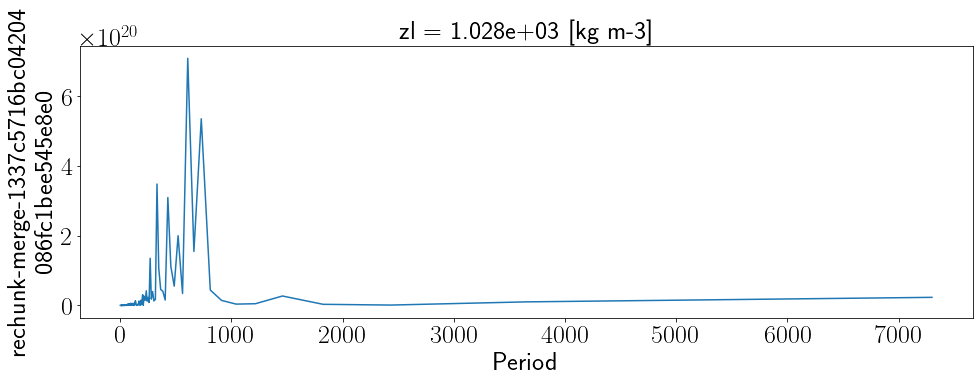

<xarray.DataArray 'freq_Time' ()>
array(608.33333333)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag1p5e-03.nc 608.3333333327801
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 51.0 51.0 51.01 ... 71.0 71.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


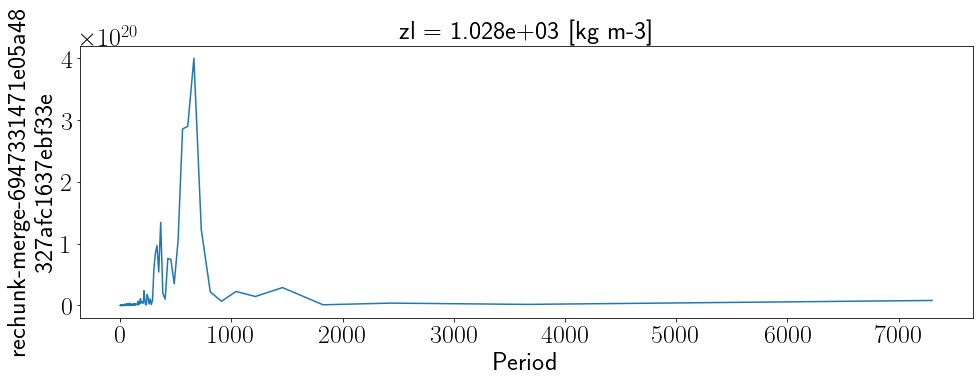

<xarray.DataArray 'freq_Time' ()>
array(663.63636364)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc 663.6363636363637
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


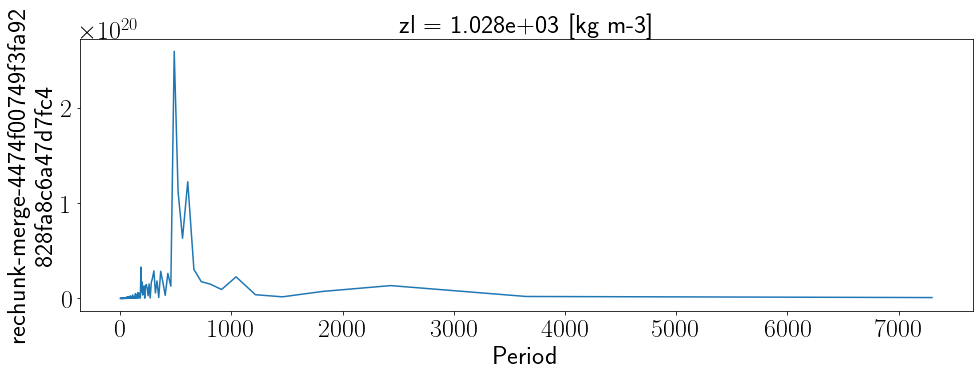

<xarray.DataArray 'freq_Time' ()>
array(486.66666667)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag3p6e-03.nc 486.666666666224
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>


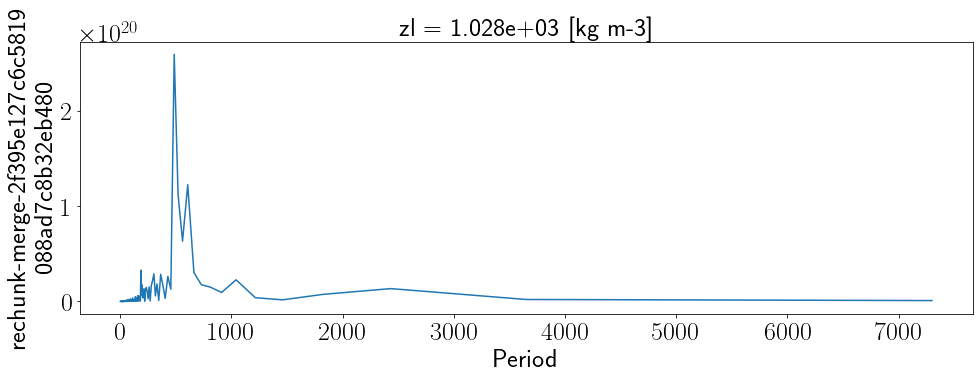

<xarray.DataArray 'freq_Time' ()>
array(486.66666667)
Coordinates:
    zl       float64 1.028e+03
4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03.nc 486.666666666224


In [45]:
value[0] = fft_period_max_totalenergy_nc('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag1p5e-03.nc', '4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag1p5e-03_APE.nc')
c.run(gc.collect)
value[1] = fft_period_max_totalenergy_nc('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc', '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_APE.nc')
c.run(gc.collect)
value[2] = fft_period_max_totalenergy_nc('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag3p6e-03.nc', '4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag3p6e-03_APE.nc')
c.run(gc.collect)
value[3] = fft_period_max_totalenergy_nc('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03.nc', '4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03_APE.nc')


In [46]:
ds.close()